In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url="http://books.toscrape.com"

In [3]:
response=requests.get(url)

In [4]:
#parse the HTML
soup=BeautifulSoup(response.text,'html.parser')

In [5]:
#Find all book containers
books=soup.find_all('article',class_='product_pod')

In [6]:
for book in books:
  title=book.h3.a['title']
  price=book.find('p',class_='price_color').text
  print(f"Title:{title}\nprice:{price}\n")

Title:A Light in the Attic
price:Â£51.77

Title:Tipping the Velvet
price:Â£53.74

Title:Soumission
price:Â£50.10

Title:Sharp Objects
price:Â£47.82

Title:Sapiens: A Brief History of Humankind
price:Â£54.23

Title:The Requiem Red
price:Â£22.65

Title:The Dirty Little Secrets of Getting Your Dream Job
price:Â£33.34

Title:The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
price:Â£17.93

Title:The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
price:Â£22.60

Title:The Black Maria
price:Â£52.15

Title:Starving Hearts (Triangular Trade Trilogy, #1)
price:Â£13.99

Title:Shakespeare's Sonnets
price:Â£20.66

Title:Set Me Free
price:Â£17.46

Title:Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
price:Â£52.29

Title:Rip it Up and Start Again
price:Â£35.02

Title:Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
price:Â£57.25

Title:Olio
price:Â£23.88

Title:Mesaerion: The Be

In [7]:
import pandas as pd

In [8]:
book_data=[]
for book in books:
  title=book.h3.a['title']
  price=book.find('p',class_='price_color').text
  print(f"Title:{title}\nprice:{price}\n")
  book_data.append({"Title":title,"Price":price})
  df=pd.DataFrame(book_data)
  print(df)

Title:A Light in the Attic
price:Â£51.77

                  Title    Price
0  A Light in the Attic  Â£51.77
Title:Tipping the Velvet
price:Â£53.74

                  Title    Price
0  A Light in the Attic  Â£51.77
1    Tipping the Velvet  Â£53.74
Title:Soumission
price:Â£50.10

                  Title    Price
0  A Light in the Attic  Â£51.77
1    Tipping the Velvet  Â£53.74
2            Soumission  Â£50.10
Title:Sharp Objects
price:Â£47.82

                  Title    Price
0  A Light in the Attic  Â£51.77
1    Tipping the Velvet  Â£53.74
2            Soumission  Â£50.10
3         Sharp Objects  Â£47.82
Title:Sapiens: A Brief History of Humankind
price:Â£54.23

                                   Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23
Title:The Requiem Red
price:Â£

In [9]:
#To view particular Book
book1=df.iloc[11]
book1
     

Title    Shakespeare's Sonnets
Price                  Â£20.66
Name: 11, dtype: object

In [10]:
top=df.head(15)
top

     

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23
5,The Requiem Red,Â£22.65
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60
9,The Black Maria,Â£52.15


In [11]:
bottom=df.tail(5)
bottom
     

,Title,Price
15,Our Band Could Be Your Life: Scenes from the A...,Â£57.25
16,Olio,Â£23.88
17,Mesaerion: The Best Science Fiction Stories 18...,Â£37.59
18,Libertarianism for Beginners,Â£51.33
19,It's Only the Himalayas,Â£45.17


In [12]:
book_data = []
conversion_rate = 104  # 1 GBP ≈ 104 INR (check current rate)

for book in books:
    title = book.h3.a['title']
    price_gbp = book.find('p', class_='price_color').text  # e.g., "£51.77"

    # Clean the price string by removing unwanted characters
    price_gbp_cleaned = price_gbp.replace('£', '').replace('Â', '').strip()

    try:
        # Convert cleaned price to float
        price_gbp_value = float(price_gbp_cleaned) if price_gbp_cleaned else 0.0

        # Convert to INR
        price_inr = price_gbp_value * conversion_rate

        # Format output
        print(f"Title: {title}\nPrice (GBP): £{price_gbp_value:.2f}\nPrice (INR): ₹{price_inr:.2f}\n")
        book_data.append({
            "Title": title,
            "Price (GBP)": f"£{price_gbp_value:.2f}",
            "Price (INR)": f"₹{price_inr:.2f}"
        })
    except ValueError:
        print(f"Error converting price for '{title}': {price_gbp}")

Title: A Light in the Attic
Price (GBP): £51.77
Price (INR): ₹5384.08

Title: Tipping the Velvet
Price (GBP): £53.74
Price (INR): ₹5588.96

Title: Soumission
Price (GBP): £50.10
Price (INR): ₹5210.40

Title: Sharp Objects
Price (GBP): £47.82
Price (INR): ₹4973.28

Title: Sapiens: A Brief History of Humankind
Price (GBP): £54.23
Price (INR): ₹5639.92

Title: The Requiem Red
Price (GBP): £22.65
Price (INR): ₹2355.60

Title: The Dirty Little Secrets of Getting Your Dream Job
Price (GBP): £33.34
Price (INR): ₹3467.36

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price (GBP): £17.93
Price (INR): ₹1864.72

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price (GBP): £22.60
Price (INR): ₹2350.40

Title: The Black Maria
Price (GBP): £52.15
Price (INR): ₹5423.60

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price (GBP): £13.99
Price (INR): ₹1454.96

Title: Shakespeare's Sonnets
Price

In [13]:
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
titles=["Book A","Book B","Book C","Book D","Book E","Book F","Book G","Book H","Book i","Book j"]
prices=[450,320,500,280,620,400,350,430,390,460]
     

In [15]:
total=pd.DataFrame({"Book Title": titles,"Price": prices})

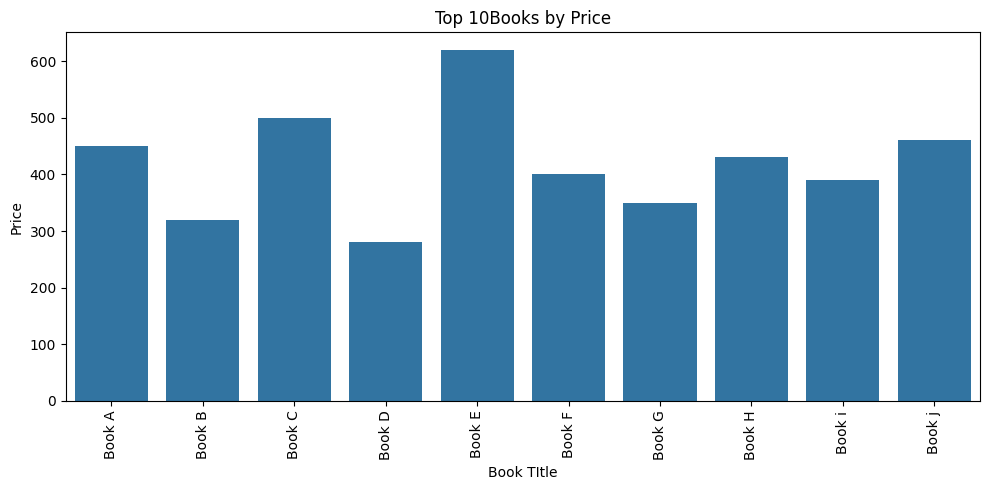

In [16]:
top10=total.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10["Book Title"],y=top10["Price"])
plt.xticks(rotation=90)
plt.title("Top 10Books by Price")
plt.xlabel("Book TItle")
plt.ylabel("Price")
plt.tight_layout()
plt.show()
